In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
# Load the dataset
dataset = pd.read_csv('/kaggle/input/insurance/insurance.csv')
# Show first 5 rows
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Show types of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Split into input and output
features = dataset.drop('charges',axis=1)
targets = dataset['charges']

# Encode categorical data using one-hot encoding
encoded_features = pd.get_dummies(features)

from sklearn.model_selection import train_test_split

# Split into train and test data (0.75/0.25)
train_features, test_features, train_targets, test_targets = train_test_split(encoded_features, targets)

In [5]:
# Show train inputs 
train_features.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
64,20,22.420,0,1,0,0,1,0,1,0,0
680,21,17.400,1,1,0,1,0,0,0,0,1
1237,58,28.215,0,1,0,1,0,0,1,0,0
572,30,43.120,2,1,0,1,0,0,0,1,0
462,62,38.095,2,1,0,1,0,1,0,0,0


In [6]:
# Show encoding
encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   sex_female        1338 non-null   uint8  
 4   sex_male          1338 non-null   uint8  
 5   smoker_no         1338 non-null   uint8  
 6   smoker_yes        1338 non-null   uint8  
 7   region_northeast  1338 non-null   uint8  
 8   region_northwest  1338 non-null   uint8  
 9   region_southeast  1338 non-null   uint8  
 10  region_southwest  1338 non-null   uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 41.9 KB


In [7]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(encoded_features, targets)

LinearRegression()

In [8]:
# Calculate and show the performance for training and test data 
(linear.score(train_features, train_targets), linear.score(test_features, test_targets))

(0.7491218307206247, 0.7564684222431983)

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Create regression model with max depth 4 and fit it to our training data
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(encoded_features, targets)

DecisionTreeRegressor(max_depth=4)

In [10]:
# Calculate and show the performance for training and test data 
(tree.score(train_features, train_targets), tree.score(test_features, test_targets))

(0.8710045504187671, 0.8595408164112714)

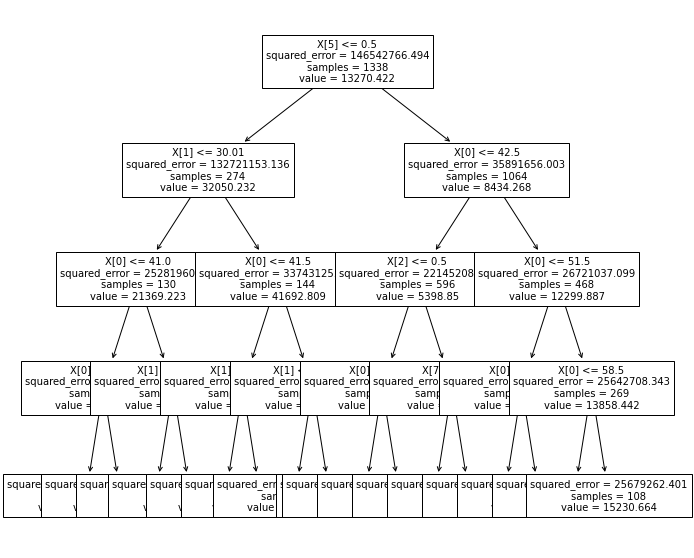

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Show our decision tree
plt.figure(figsize=(10,10))
plot_tree(tree,fontsize=10)
plt.show()


In [12]:
encoded_features.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
